In [14]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt


1228800

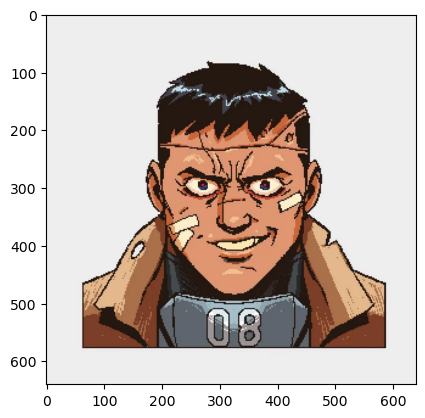

In [34]:
img_read = plt.imread("img.webp")
plt.imshow(img_read)
img_read.size

In [16]:
print(img_read.shape)

(640, 640, 3)


In [17]:
print(img_read)

[[[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 ...

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [238 238 238]
  [238 238 238]
  [238 238 238]]]


In [18]:
rows,columns,rgb =  img_read.shape
two_d_image = img_read.reshape(rows*columns,rgb)

In [19]:
print(two_d_image.shape)
print(two_d_image.dtype)

(409600, 3)
uint8


In [20]:
print(two_d_image)

[[238 238 238]
 [238 238 238]
 [238 238 238]
 ...
 [238 238 238]
 [238 238 238]
 [238 238 238]]


In [21]:
def select_centroids(two_d_image, k):
    centroids_index = np.random.choice(len(two_d_image), k, replace=False)
    centroids = two_d_image[centroids_index]
    return centroids
k = 2 
centroids = select_centroids(two_d_image, k)
print("Random centroids:", centroids)


Random centroids: [[238 238 238]
 [ 94 101 110]]


In [22]:
def assign_data_points_to_nearest_centroid(two_d_image, centroids):
    distances = np.linalg.norm(two_d_image[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    return labels


In [23]:
labels = assign_data_points_to_nearest_centroid(two_d_image, centroids)
print("Labels:", labels)

Labels: [0 0 0 ... 0 0 0]


In [24]:
def update_centroids(two_d_image, labels, k):
    centroids = np.zeros((k, two_d_image.shape[1])) 
    
    for i in range(k):
        assigned_points = two_d_image[labels == i]
        if len(assigned_points) > 0:
            centroids[i] = np.mean(assigned_points, axis=0)
    return centroids


In [25]:
new_centroids = update_centroids(two_d_image, labels, k)
print("Updated centroids:", np.floor(new_centroids))


Updated centroids: [[191. 184. 181.]
 [202. 157. 130.]]


In [26]:
def kmeans_clustering(two_d_image, k, max_iterations=100):
    centroids = select_centroids(two_d_image, k)
    for _ in range(max_iterations):
        labels = assign_data_points_to_nearest_centroid(two_d_image, centroids)# Assign data points to nearest centroids
        new_centroids = update_centroids(two_d_image, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [29]:
k = 5 # Number of clusters
labels, centroids = kmeans_clustering(two_d_image, k)
print("Final labels:", labels)
print("Final centroids:", centroids)

Final labels: [3 3 3 ... 3 3 3]
Final centroids: [[ 38.47737952  23.81017877  16.80980071]
 [207.58803224 137.58975817 100.82472003]
 [209.7618007  178.48649961 150.37864219]
 [238.06633509 237.87833722 237.42047976]
 [108.9703017   79.85816049  69.64191808]]


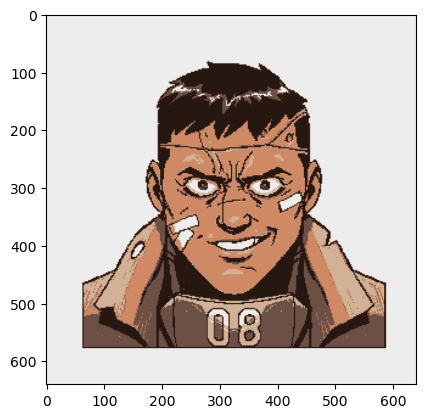

<Figure size 640x480 with 0 Axes>

In [35]:
rows, columns, rgb = img_read.shape
original_shape = (rows, columns, rgb)

reconstructed_image = centroids[labels]
reconstructed_image = reconstructed_image.reshape(original_shape)
plt.imshow(reconstructed_image.astype(np.uint8))
plt.show()

plt.savefig("afterk_mean.png")